# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')

In [2]:
medical.shape

(1338, 8)

In [3]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

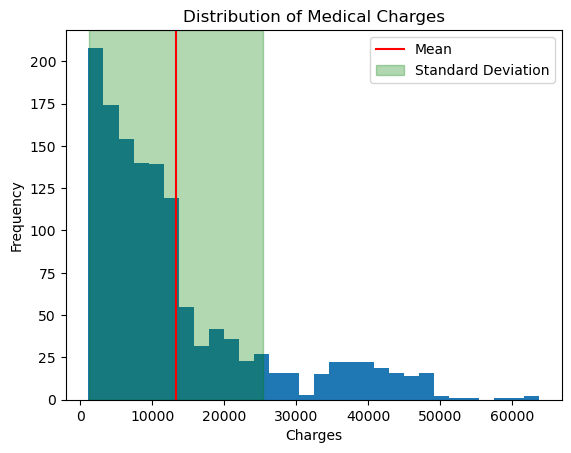

Mean: 13270.42, Std Dev: 12110.01


In [4]:
charges = medical['charges']

# calculate mean and standard deviation
mean = np.mean(charges)
stddev = np.std(charges, ddof=1)

# plot the distribution with mean
_ = plt.hist(charges, bins = 30)
_ = plt.xlabel('Charges')
_ = plt.ylabel('Frequency')
_ = plt.axvline(mean, color='r', label='Mean')
_ = plt.axvspan(mean-stddev, mean+stddev, alpha=0.3, color='g', label='Standard Deviation')
_ = plt.legend()
_ = plt.title('Distribution of Medical Charges')
_ = plt.show()

print(f"Mean: {mean:.2f}, Std Dev: {stddev:.2f}")

* Since the distribution of charges is right-skewed, it means that the majority of the charges are concentrated on the lower end of the range, and there are a few observations with very high charges that are driving the mean up. 
* In this case, the mean may not be an appropriate measure of central tendency because it is sensitive to extreme values. Instead, we can use the median as a measure of central tendency.
* Additionally, we can use measures of spread that are less sensitive to extreme values, such as the interquartile range (IQR), instead of the standard deviation.
* If we take a big enough sample, we can choose to select either mean or median to be the measure of central tendency.

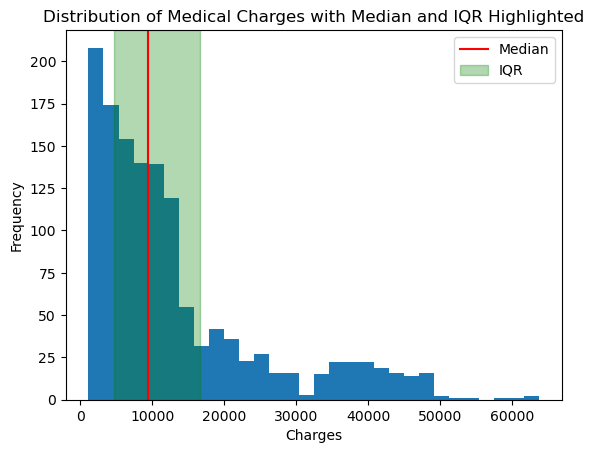

Median: 9382.03, Interquartile Range (IQR): 11899.63


In [5]:
# calculate median and interquartile range (IQR)
median = np.median(charges)
q1, q3 = np.percentile(charges, [25, 75])
iqr = q3 - q1

# plot histogram with median and IQR
_ = plt.hist(charges, bins=30)
_ = plt.xlabel('Charges')
_ = plt.ylabel('Frequency')
_ = plt.axvline(median, color='r', label='Median')
_ = plt.axvspan(q1, q3, alpha=0.3, color='g', label='IQR')
_ = plt.legend()
_ = plt.title('Distribution of Medical Charges with Median and IQR Highlighted')
_ = plt.show()

print(f'Median: {median:.2f}, Interquartile Range (IQR): {iqr:.2f}')

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ Even though the population distribution is right-skewed, we can still use Central Limit Theorem to make inferences on the population, as the theorem states that the sample mean of a sufficiently large random sample will be normally distributed, *regardless of the shape of the underlying population distribution*.

Since we do not know the standard deviation of the population, we should use the t-distribution in this case.

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__

We should use a one-sided confidence interval in this case as it will only provide an interval in one direction, which is useful when we are interested in testing whether the population mean is below a certain threshold value.

In [6]:
t_crit = t.ppf(0.95, (len(charges)-1))
print(f"Critical value: {t_crit:.2f}")

Critical value: 1.65


In [7]:
moe = t_crit * stddev / np.sqrt(len(charges))
lower_bound = mean - moe

print(f"Lower bound value of the CI, using critical t value: {lower_bound:.2f}")

Lower bound value of the CI, using critical t value: 12725.49


* We can say with 95% confidence that the true population mean is greater than \$12725.49. 
* Since this value is greater than the administrator's threshold of \$12,000, the administrator should not be concerned that the true mean has fallen below this value.

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__ **Null hypotheses:** People with insurance are charged the same amount as those without insurance.

**Alternative hypotheses:** The amount charged to people with insurance is significantly different from the amount charged to people without insurance.

**Assumption:** We are assuming that the 2 groups have equal variances.

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [8]:
# create 2 separate filters from the dataframe medical, based on insuranceclaim
ins = medical[medical['insuranceclaim'] == 1]['charges']
not_ins = medical[medical['insuranceclaim'] == 0]['charges']

# calculate pooled standard deviation
n0 = len(ins)
n1 = len(not_ins)
s0 = np.std(ins, ddof=1)
s1 = np.std(not_ins, ddof=1)
dof = n0+n1-2

sp = np.sqrt((((n0-1)*(s0**2)) + ((n1-1)*(s1**2))) / dof)

print(f"Pooled Standard Deviation: {sp:.2f}")

Pooled Standard Deviation: 11520.03


In [9]:
# calculate critical t value and p value manually
x0_bar = np.mean(ins)
x1_bar = np.mean(not_ins)

t_stat_man = (x0_bar - x1_bar) / (sp * np.sqrt(1/n0 + 1/n1))
pvalue_man = 1 - t.cdf(t_stat_man, df = dof)

print(f"t statistic (calculated manually): {t_stat_man:.2f}")
print(f"p value (calculated manually): {pvalue_man}")

t statistic (calculated manually): 11.89
p value (calculated manually): 0.0


In [10]:
# calculate critical t value and p value using ttest_ind
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(ins, not_ins)

print(f"t statistic (calculated using ttest_ind: {t_stat:.2f}")
print(f"p value (calculated using ttest_ind): {p_value:.1f}")

t statistic (calculated using ttest_ind: 11.89
p value (calculated using ttest_ind): 0.0


Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ A exact substitute function to do z-tests is not available in the documentation for scipy.stats. 

But, we can use the **zscore** function from the same module to calculate the z-score for a sample, and then calculate the p-value using the normal distribution.

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test